In [1]:
import sys, os
p = '../modules/'
if p not in sys.path:
    sys.path.insert(0, p)
    
%reload_ext autoreload
%autoreload 2

# Figure 3 B,C

In [2]:
from binding.model.elements import Element
from figures.phase import PhaseDiagram, TitrationContours

In [3]:
# define binding energies (energies in kcal/mole, ordered [Pnt,Yan])
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [a0*2, a0*2] 
beta = [b0*2, b0*2] 
gamma = [0, 0]
binding_energies = dict(alpha=alpha, beta=beta, gamma=gamma)

# define binding element size and configuration
element_size = 12
strong_sites = (0,)

# instantiate binding element
element = Element(Ns=element_size, params=binding_energies, ets=strong_sites)

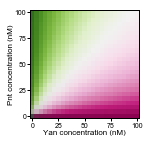

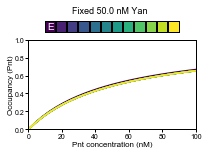

In [4]:
# Figure 3B
Fig3B = PhaseDiagram(element)
Fig3B.render()

# Figure 3C
Fig3C = TitrationContours(element)
Fig3C.render(yan_level=50)

# Figure 3 E,F

In [5]:
from binding.model.elements import Element
from figures.phase import PhaseDiagram, TitrationContours

In [6]:
# define binding energies (energies in kcal/mole, ordered [Pnt,Yan])
a0, b0, c0 = -9.955, -5.837, -7.043
alpha = [.96*(a0+c0), a0] 
beta = [.96*(b0+c0), b0] 
gamma = [0, c0]
binding_energies = dict(alpha=alpha, beta=beta, gamma=gamma)

# define binding element size and configuration
element_size = 12
strong_sites = (0,)

# instantiate binding element
element = Element(Ns=element_size, params=binding_energies, ets=strong_sites)

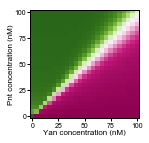

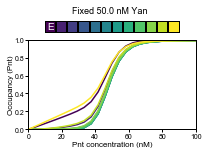

In [7]:
# Figure 3E
Fig3E = PhaseDiagram(element)
Fig3E.render()

# Figure 3F
Fig3F = TitrationContours(element)
Fig3F.render(yan_level=50)

# Figure S4

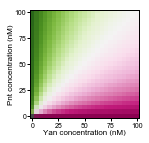

In [8]:
# Figure S4
FigS4 = PhaseDiagram(element=None)
FigS4.render()

In [84]:
cms = microstates.get_c_microstates()
a,b,g = cms.get_energy_contributions()
pf = PartitionFunction(microstates, sweep.C)
probabilities = pf.preallocate_probabilities()
R = 1.987204118*1E-3
T = 300
gc = np.vstack((a,b,g))
#ec = np.exp(-gc/(R*T))
ec = -gc
contrib = np.dot(probabilities, ec.T)
contrib = contrib / contrib.sum(axis=1).reshape(-1, 1)
contrib = contrib.reshape((sweep.density, sweep.density, 6))
binding = contrib[:,:,:4].sum(axis=-1)
polymerization = 1 - binding

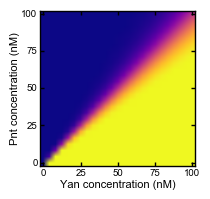

In [86]:
# plot contributions

# create figure

figsize = (2, 2)
name = 'Polymerization'
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=figsize)

# visualize occupancy
cmap = plt.cm.plasma
ax.imshow(polymerization, cmap=cmap, vmin=0, vmax=.5)
ax.invert_yaxis()
ax.set_xlabel('Yan concentration (nM)')
ax.set_ylabel('Pnt concentration (nM)')
ax.set_aspect(1)
sweep.format_ticks(ax)
#fig.savefig('unequal_contributions.pdf', dpi=400, format='pdf')